<a href="https://colab.research.google.com/github/Dindaa45/Pemograman_Python/blob/main/TUBES_SKO_Dinda_Mafruhat_1101184119.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TUBES SKO**

**NAMA = DINDA MAFRUHAT**

**NIM = 1101184119**

**KELAS = TT 42 07**



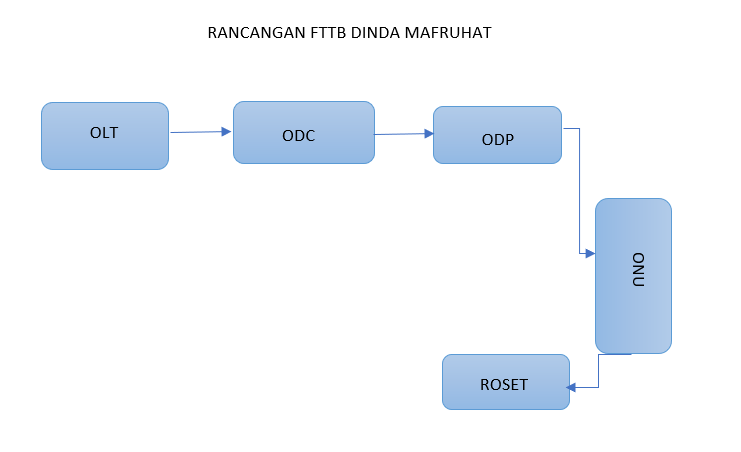

**PENJELASAN:**

Diketahui sebuah gedung 40 lantai, tiap lantai terdapat 20 kamar. 

Parameter - Parameter

1. Menggunakan 6 Konektor

2. Spliter1 ( 1:64 )

3. Spliter2 ( 1:32 )

4. Redaman1 **19.5 dB**

5. Redaman2 **16 dB**

 Menggunakan Fiver jenis **G625D** dengan panjang gelombang 1490 nm dengan redaman 0.28 dB/Km. dengan melihat jumlah konektor menjadi 6 konektor dan 8 buah splicer dengan redaman sebesar 0.1 dB.



In [39]:
import numpy as np
import matplotlib.pyplot as pl
import math as m

In [40]:
#Nilai Lamda
NtL = lambda x : 10 * np.log10(x)
LtN = lambda x : 10**(x/10)

#Nilai Parameter
R = 0.85 #(A/W)
SM = 3 #(dB)
M = -0.23 #(dB)
q = 1.6*10**-19
id = 200*10**-9 #(A)
B = 8*10**9 #(Hz)
F = 1 #F(M), Faktor Gain
K = 1.38*10**-23
Teff = 290 #Kelvin
RL = 50 #(Ohm)
d = np.arange(0.116,18.117,1) #(km)
L_fiber = 0.28 #(dB)  
N_splicer = 8 #Jumlah Splicer
L_splicer = 0.1 #(db)
N_connector = 6 #Jumlah Konektor
L_connector = 0.3 #(dB)
L_splitter = 16 + 19.5 #(dB) 
Pt = 3 #Daya tx (dBm)

In [41]:
#RUMUS X_receive
def X_receive():
  hambatan_fiber = d * L_fiber
  hambatan_splicer = N_splicer * L_splicer
  hambatan_connector = N_connector * L_connector

  alfa_total = hambatan_fiber + hambatan_splicer + hambatan_connector + L_splitter + SM
  Pr = Pt - alfa_total
  return Pr

Pr = X_receive()
print('Daya Terima = ', Pr)

Daya Terima =  [-38.13248 -38.41248 -38.69248 -38.97248 -39.25248 -39.53248 -39.81248
 -40.09248 -40.37248 -40.65248 -40.93248 -41.21248 -41.49248 -41.77248
 -42.05248 -42.33248 -42.61248 -42.89248 -43.17248]


In [42]:
#Arus Dalam
def arus_dalam():
  Pr_num = LtN(Pr)
  ip = Pr_num * R
  return ip
ip = arus_dalam()
print("Ip = ", ip)

Ip =  [1.30668506e-04 1.22509827e-04 1.14860559e-04 1.07688896e-04
 1.00965018e-04 9.46609646e-05 8.87505240e-05 8.32091194e-05
 7.80137089e-05 7.31426895e-05 6.85758068e-05 6.42940710e-05
 6.02796783e-05 5.65159361e-05 5.29871945e-05 4.96787804e-05
 4.65769371e-05 4.36687666e-05 4.09421765e-05]


In [43]:
#Signal Power
def signal_power():
  Is_kuadrat = (ip*M)**2
  return Is_kuadrat
Is_kuadrat = signal_power()
print('Is^2 = ', Is_kuadrat)

Is^2 =  [9.03228273e-10 7.93957990e-10 6.97906950e-10 6.13475924e-10
 5.39259151e-10 4.74020936e-10 4.16675076e-10 3.66266774e-10
 3.21956742e-10 2.83007225e-10 2.48769724e-10 2.18674188e-10
 1.92219536e-10 1.68965300e-10 1.48524303e-10 1.30556207e-10
 1.14761845e-10 1.00878246e-10 8.86742499e-11]


In [44]:
#RUMUS SNR
def SNR():
  BDC = 2*q*id*B*(M**2)*F 
  SN = 2*q*ip*B*(M**2)*F 
  NT = (4*K*Teff*B)/RL 
  Signal = Is_kuadrat
  Noise = BDC + SN + NT

  SNR = Signal / Noise
  SNR_dBm = NtL(SNR)
  return SNR_dBm

SNR = SNR()
print(SNR)

[25.4434572  24.88531818 24.32706369 23.76870085 23.21023634 22.65167646
 22.09302709 21.53429378 20.97548171 20.41659576 19.85764052 19.29862027
 18.73953904 18.18040063 17.62120858 17.06196622 16.50267667 15.94334286
 15.38396756]


In [45]:
#RUMUS Y
def Y_rumus():
  Y_rumus = 0.5*(10**(SNR/20))
  return Y_rumus
Y = Y_rumus()
print(Y)

[9.35713434 8.77477347 8.22854766 7.71622791 7.23572115 6.78506211
 6.36240571 5.96601984 5.59427859 5.24565582 4.9187192  4.61212445
 4.32461008 4.05499232 3.80216039 3.56507208 3.34274954 3.13427535
 2.93878884]


In [46]:
#RUMUS BER
pengkali_list = []
def BER_rumus():
  akar = 1/(Y * m.sqrt(2 * m.pi))
  for i in range(len(Y)):
    pengkali = m.exp(-(Y[i]**2)/2)
    pengkali_list.append(pengkali)
  BER = (1/akar)*(pengkali_list)
  return BER
BER = BER_rumus()
print(BER)

[2.27875167e-18 4.19484446e-16 4.08875734e-14 2.27777413e-12
 7.75683450e-11 1.71325302e-09 2.58550965e-08 2.79104989e-07
 2.24390361e-06 1.39209771e-05 6.87583361e-05 2.77908437e-04
 9.41660577e-04 2.73234783e-03 6.91747918e-03 1.55336496e-02
 3.13903416e-02 5.78151480e-02 9.81455342e-02]


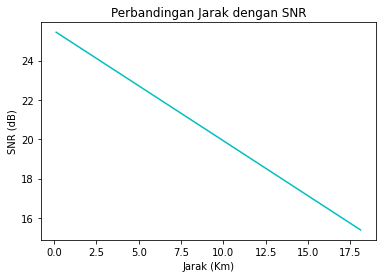

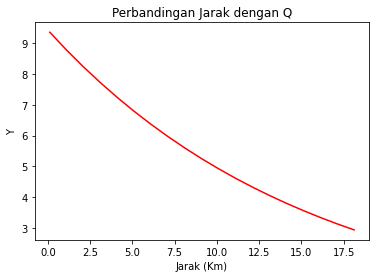

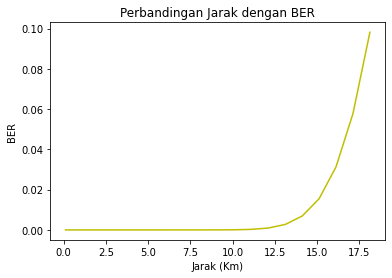

In [47]:
#GRAFIK
def grafik_1():
  pl.figure()
  pl.plot(d,SNR,'c')
  pl.title('Perbandingan Jarak dengan SNR')
  pl.xlabel('Jarak (Km)')
  pl.ylabel('SNR (dB)')
  pl.show()

def grafik_2():
  pl.figure()
  pl.plot(d,Y,'r')
  pl.title('Perbandingan Jarak dengan Q')
  pl.xlabel('Jarak (Km)')
  pl.ylabel('Y')
  pl.show()

def grafik_3():
  pl.figure()
  pl.plot(d,BER,'y')
  pl.title('Perbandingan Jarak dengan BER')
  pl.xlabel('Jarak (Km)')
  pl.ylabel('BER')
  pl.show()

grafik_1()
grafik_2()
grafik_3()